In [1]:
import pandas as pd
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
#! pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org keras-tuner 
import keras_tuner
import keras

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
cwd=os.getcwd()
data_folder=cwd+'/Data'
df=pd.read_csv(data_folder+'/Diabetes.csv',sep=';')

In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0,shuffle=True,stratify=y)

In [ ]:
model = Sequential()
model.add(Dense(12, input_shape=(x_train.shape[1],), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history=model.fit(x_train, y_train, epochs=150, batch_size=10,verbose=False)

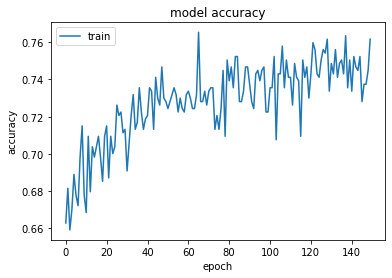

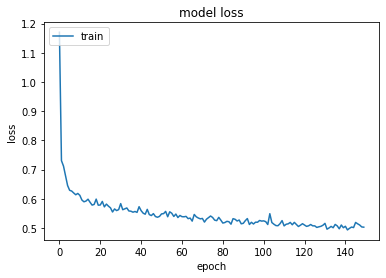

In [ ]:
# ploteamos evolución de accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# ploteamos evolución perdida
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
_, accuracy = model.evaluate(x_train, y_train, verbose=0)
print('The accuracy is {accuracy} %'.format(accuracy=round(accuracy*100,2)))

The accuracy is 76.91 %


In [ ]:
_, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('The accuracy is {accuracy} %'.format(accuracy=round(accuracy*100,2)))

The accuracy is 75.32 %


In [ ]:
# make probability predictions with the model
predictions = (model.predict(x_test)>0.5).astype(int)

8/8 [==============================] - 0s 3ms/step


In [ ]:
flat_pred= [x for pred_list in predictions for x in pred_list]

In [ ]:
comp_test=pd.DataFrame({'output':y_test,'preds':flat_pred})

In [ ]:
comp_test

,output,preds
608,0,0
626,0,0
678,1,1
186,1,1
520,0,0
...,...,...
8,1,1
529,0,0
273,0,0
11,1,1


In [ ]:
value_pred=[[0, 150,75,80,52,170,42,0.75]]
y_pred = model.predict(value_pred)

1/1 [==============================] - 0s 61ms/step


In [ ]:
def build_model(hp):
    model = Sequential()
    model.add(Dense(hp.Choice('units', [8, 16, 32]), input_shape=(x_train.shape[1],), activation='relu'))
    model.add(Dense(hp.Choice('units',[8,10]), hp.Choice('activation', ['relu','elu'])))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
tuner = keras_tuner.RandomSearch(
    build_model,
    objective='val_loss',
    overwrite=True,
    max_trials=5)

Reloading Tuner from .\untitled_project\tuner0.json


In [ ]:
tuner.search(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
best_model = tuner.get_best_models()[0]

In [ ]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1377 (5.38 KB)
Trainable params: 1377 (5.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
def build_model2(hp):
    model_2 = Sequential()
    counter = 0
    for i in range(hp.Int('layers', 1, 6)):
        if counter==0:
            model_2.add(Dense(hp.Choice('units', [8, 16, 32]),activation='relu', input_dim = 8))
            counter=1
        else:          
            model_2.add(Dense(units=hp.Choice('units_' + str(i), [8, 16, 32]),
                        activation=hp.Choice('act_' + str(i), ['relu', 'elu'])))
    model_2.add(Dense(1, activation='sigmoid'))
    model_2.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=1e-3), metrics=['accuracy'])
    return model_2

In [ ]:
tuner2 = keras_tuner.RandomSearch(
    build_model2,
    objective='val_loss',
    overwrite=True,
    max_trials=5)

In [ ]:
tuner2.search(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
best_model_2 = tuner2.get_best_models()[0]

Trial 5 Complete [00h 00m 02s]
val_loss: 0.7014873623847961

Best val_loss So Far: 0.6709917187690735
Total elapsed time: 00h 00m 11s


In [ ]:
best_model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                144       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 8)                 72        
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 433 (1.69 KB)
Trainable params: 433 (1.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
